<a href="https://colab.research.google.com/github/PanagiotisPetrid/ASTRO-BEAM-recruitment/blob/main/ASTRO_BEAM_recruitment_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following notebook is a copy of the notebook ASTRO_BEAM_recruitment, but with small changes, according to Task 7 of the recruitment task.
The changes are the following:

*   **New** sample signal (used a sin and a cos wave to generate)
*   Used a **brownian noise** type in step 1
*   Used the **Savitzky-Golay algorithm** to smooth the curve at step 2.3
*   Used **polynomial interpolation** in step 3

In [1]:
# Execute this block to install the necessary dependencies
%pip install colorednoise
import numpy as np
import matplotlib.pyplot as plt
import colorednoise as cn
from scipy.signal import savgol_filter

#1. Simulating a radio signal

##Creating an "off" signal

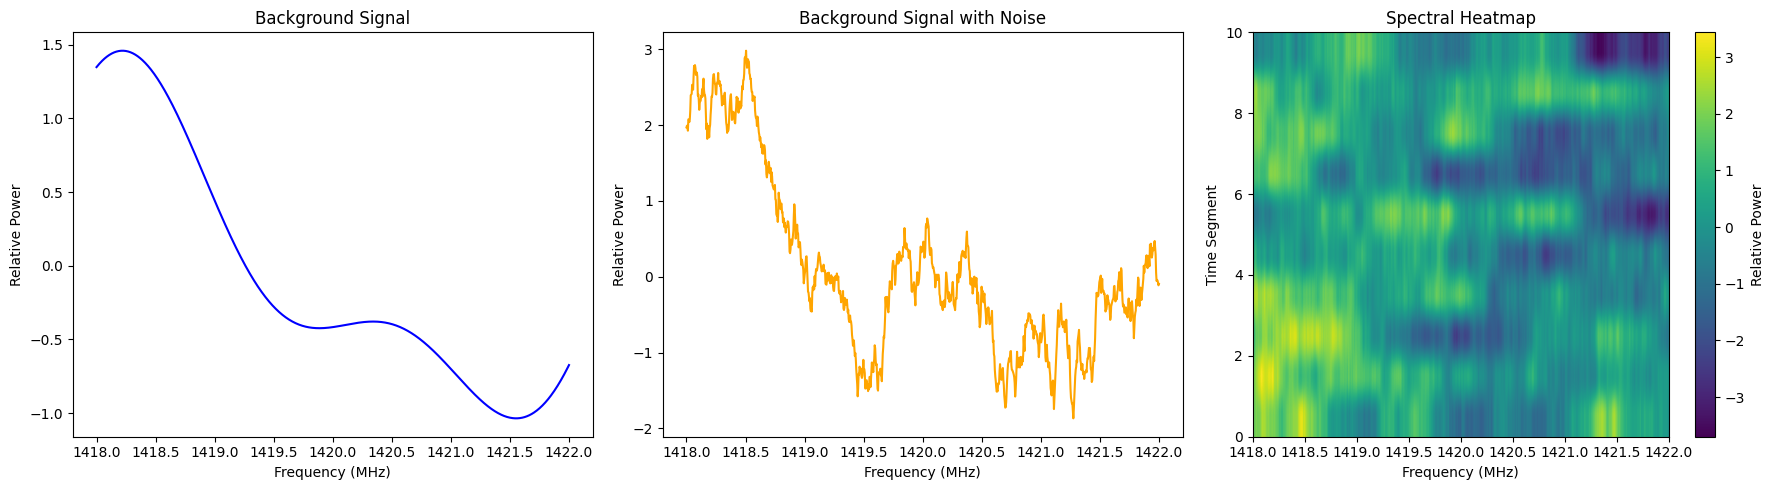

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import colorednoise as cn  # Ensure you have this library installed

# Signal parameters
n_samples = 1000  # Number of sample measurements
freq_range = np.linspace(1418, 1422, n_samples)  # Evenly spaced frequencies of the signal (bandwidth of 4 MHz)

# Create a sample signal using a sine and cosine wave
background_signal = (0.5 * np.sin(0.8 * np.pi * freq_range) + np.cos(0.4 * np.pi * freq_range + 2))

# Noise generation (Brownian noise with β = 2)
beta = 2  # Exponent for noise (β = 2 corresponds to brownian noise)
noise = cn.powerlaw_psd_gaussian(beta, n_samples)

# Add noise to the background signal
background_signal_noised = background_signal + noise

#-------------------------------------------------------------------------------------------------------------
# Signal parameters (same as before)
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)

# Defined a function to automate random sample signal generation
def generate_background_signal(freq_range):
    background_signal = (0.5 * np.sin(0.8 * np.pi * freq_range) + np.cos(0.4 * np.pi * freq_range + 2))
    beta = 2
    noise = cn.powerlaw_psd_gaussian(beta, n_samples)
    background_signal_noised = background_signal + noise
    return background_signal_noised

#Define the time segments we will use for our waterfall
n_time_segments = 10

# Create an empty array to store the signals for each time segment
waterfall = np.zeros((n_time_segments, n_samples))

for i in range (n_time_segments):
    waterfall[i, :] = generate_background_signal(freq_range)

#-------------------------------------------------------------------------------------------------------------
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot the background signal in the first subplot
axs[0].plot(freq_range, background_signal, color="blue")
axs[0].set_title("Background Signal")
axs[0].set_xlabel("Frequency (MHz)")
axs[0].set_ylabel("Relative Power")

# Plot the background signal with noise in the second subplot
axs[1].plot(freq_range, background_signal_noised, color="orange")
axs[1].set_title("Background Signal with Noise")
axs[1].set_xlabel("Frequency (MHz)")
axs[1].set_ylabel("Relative Power")

# Plot the heatmap in the third subplot
cax = axs[2].imshow(waterfall, aspect='auto', cmap='viridis', extent=[freq_range[0], freq_range[-1], 0, n_time_segments])
axs[2].set_title("Spectral Heatmap")
axs[2].set_xlabel("Frequency (MHz)")
axs[2].set_ylabel("Time Segment")
plt.colorbar(cax, ax=axs[2], label="Relative Power")

# Display the plots
plt.tight_layout()
plt.show()

##Creating an "on" signal

Steps 1-4 | Introducing the hydrogen line at 1420 MHz

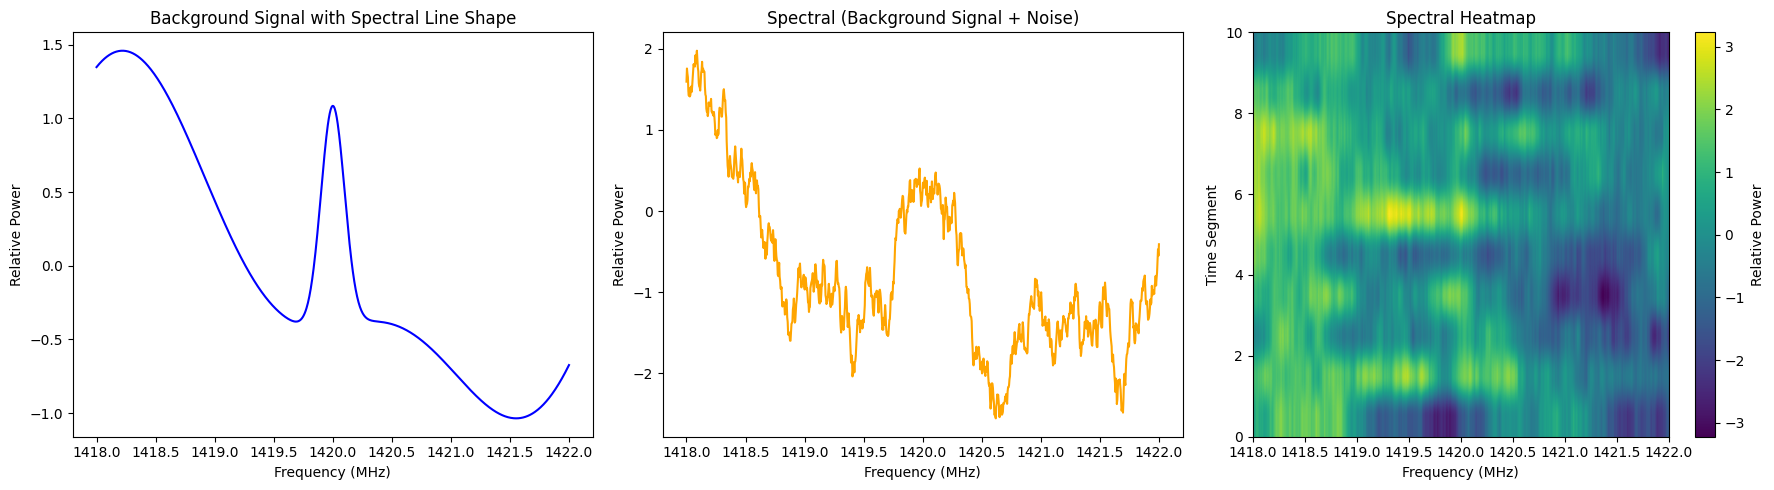

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import colorednoise as cn  # Ensure you have this library installed

# Signal parameters
n_samples = 1000  # Number of sample measurements
freq_range = np.linspace(1418, 1422, n_samples)  # Evenly spaced frequencies of the signal (bandwidth of 4 MHz)

# Create a sample signal using sine and cosine waves
background_signal = (0.5 * np.sin(0.8 * np.pi * freq_range) + np.cos(0.4 * np.pi * freq_range + 2))

# Add the spectral line at 1420 MHz
spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)

# Add the spectral_line_shape to the background signal
background_signal += 1.5 * spectral_line_shape

# Noise generation (Brownian noise with β = 2)
beta = 2  # Exponent for noise (β = 2 corresponds to brownian noise)
noise = cn.powerlaw_psd_gaussian(beta, n_samples)

# Add noise to the background signal to create the spectral signal
spectral = background_signal + noise
#-------------------------------------------------------------------------------------------------------------
# Signal parameters (same as before)
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)

# Defined a function to automate random sample signal generation
def generate_spectral_signal(freq_range):
    background_signal = (0.5 * np.sin(0.8 * np.pi * freq_range) + np.cos(0.4 * np.pi * freq_range + 2))
    beta = 2
    noise = cn.powerlaw_psd_gaussian(beta, n_samples)
    background_spectral_noised = background_signal + noise # Add noise
    spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)
    background_spectral_noised += spectral_line_shape # Add spectral line shape
    return background_spectral_noised

#Define the time segments we will use for our waterfall
n_time_segments = 10

# Create an empty array to store the signals for each time segment
waterfall = np.zeros((n_time_segments, n_samples))

for i in range (n_time_segments):
    waterfall[i, :] = generate_spectral_signal(freq_range)

#-------------------------------------------------------------------------------------------------------------
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot the background signal with spectral line in the first subplot
axs[0].plot(freq_range, background_signal, color="blue")
axs[0].set_title("Background Signal with Spectral Line Shape")
axs[0].set_xlabel("Frequency (MHz)")
axs[0].set_ylabel("Relative Power")

# Plot the background signal with noise in the second subplot
axs[1].plot(freq_range, spectral, color="orange")
axs[1].set_title("Spectral (Background Signal + Noise)")
axs[1].set_xlabel("Frequency (MHz)")
axs[1].set_ylabel("Relative Power")

# Plot the heatmap in the third subplot
cax = axs[2].imshow(waterfall, aspect='auto', cmap='viridis', extent=[freq_range[0], freq_range[-1], 0, n_time_segments])
axs[2].set_title("Spectral Heatmap")
axs[2].set_xlabel("Frequency (MHz)")
axs[2].set_ylabel("Time Segment")
plt.colorbar(cax, ax=axs[2], label="Relative Power")

# Display the plots
plt.tight_layout()
plt.show()

Gnerating the spactral line shape with twice the samples

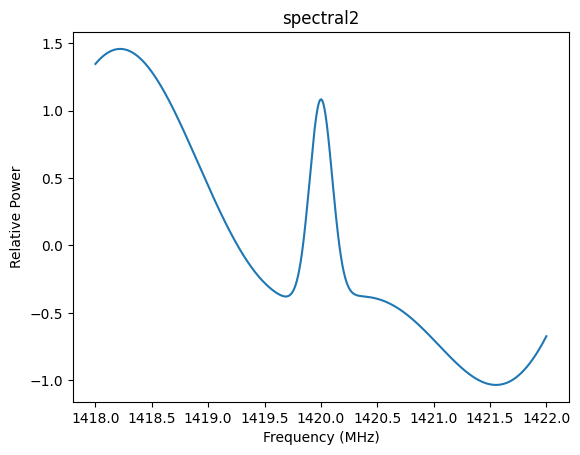

In [63]:
# Signal parameters
n_samples2 = 2000 # Twice the previous number of sample measurements
freq_range2 = np.linspace(1418, 1422, n_samples2)  # We create an evenly spaced list with frequencies of a signal (with a bandwidth of 4 MHz)

# Created a sample signal using a sin and a cos wave
spectral2 = (0.5 * np.sin(0.8 * np.pi * freq_range2) + np.cos(0.4 * np.pi * freq_range2 + 2))

# Add the spectral line at 1420 MHz
spectral_line_shape2 = np.exp(-0.5 * ((freq_range2 - 1420) / 0.1)**2)

# Add the spectral_line_shape to the background signal
spectral2 += 1.5 * spectral_line_shape2

#Plot the background signal
plt.plot(freq_range2, spectral2)
plt.title("spectral2")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

#To continue the task, execute the following code (ensures more predictable noise by generating noise with μ = 0, σ = 0.2)

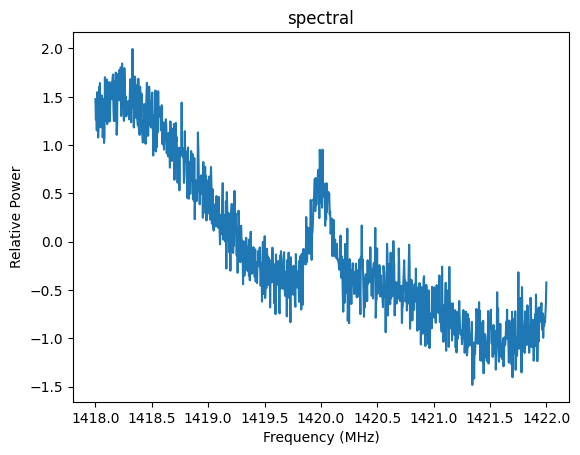

In [69]:
# Signal parameters
n_samples = 1000  # Number of sample measurements
freq_range = np.linspace(1418, 1422, n_samples)  # Frequencies of the signal (with a bandwidth of 4 MHz)

# Create a sample signal using 2 random sin waves
background_signal = (0.5 * np.sin(0.8 * np.pi * freq_range) + np.cos(0.4 * np.pi * freq_range + 2))

# Noise generation
noise = np.random.normal(0, 0.2, len(background_signal))  # Generate noise with μ = 0, σ = 0.2

# Add the spectral line at 1420 MHz
spectral_line_shape = np.exp(-0.8 * ((freq_range - 1420) / 0.1)**2)

# Generate the "spectral" signal
spectral = background_signal + noise + spectral_line_shape

#Plot the spectral signal to ensure correct execution of code
plt.plot(freq_range, spectral)
plt.title("spectral")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

#2. Signal Smoothing

2.1 Averaging over time

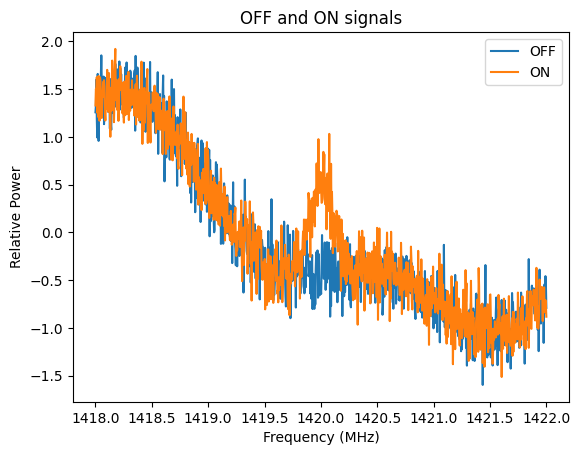

In [70]:
# Signal parameters
n_samples = 1000 # Number of sample measurements
freq_range = np.linspace(1418, 1422, n_samples)  # We create an evenly spaced list with frequencies of a signal (with a bandwidth of 4 MHz)

# Creating "OFF" signal according to previous steps
background_signal_OFF = (0.5 * np.sin(0.8 * np.pi * freq_range) + np.cos(0.4 * np.pi * freq_range + 2))
noise = np.random.normal(0, 0.2, len(background_signal))
signal_OFF = background_signal_OFF + noise

#Create "ON" signal according to previous steps
background_signal_ON = background_signal_OFF
spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)
background_signal_ON += spectral_line_shape
noise = np.random.normal(0, 0.2, len(background_signal))
signal_ON = background_signal_ON + noise

#Plot both the signals
plt.plot(freq_range, signal_OFF, label="OFF")
plt.plot(freq_range, signal_ON, label="ON")
plt.title("OFF and ON signals")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.legend()
plt.show()

2.2 Removing Background

<ipython-input-74-d8f3b89e408e>:8: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(freq_range, signal_ON, degree)


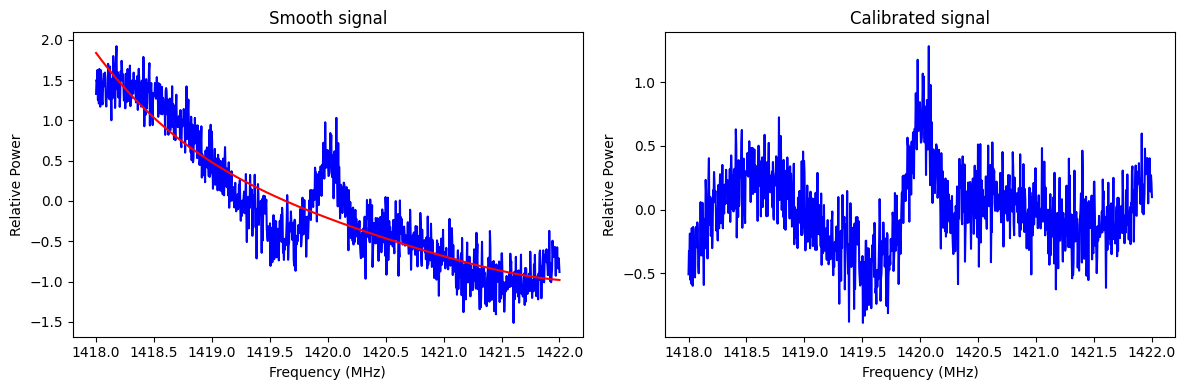

Fitted coefficients: [ 8.65122257e-23 -1.22984077e-19 -1.74512021e-16 -4.10840139e-14
  2.35062679e-10  5.00198877e-07  4.73110456e-04 -1.69214032e-01
 -1.43378078e+03 -2.03433829e+06  2.89209020e+09]


In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Degree of the polynomial fit
degree = 10  # You can increase or decrease this depending on the fit

# Fit the polynomial to the smooth data
coefficients = np.polyfit(freq_range, signal_ON, degree)
polynomial_fit = np.poly1d(coefficients)

# Generate fitted values
fit_y_poly = polynomial_fit(freq_range)

#Calibrate signal by subtracting polynomial fit from the original signal
calibrated_signal = signal_ON - fit_y_poly

# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

#Plot the original smooth signal along with the poly fit
axs[0].plot(freq_range, signal_ON, label='Data', color='blue')
axs[0].plot(freq_range, fit_y_poly, '-', label=f'Polynomial Fit (Degree {degree})', color='red')
axs[0].set_title("Smooth signal")
axs[0].set_xlabel("Frequency (MHz)")
axs[0].set_ylabel("Relative Power")

# Plot the new calibrated_signal
axs[1].plot(freq_range, calibrated_signal, label='Data', color='blue')
axs[1].set_title("Calibrated signal")
axs[1].set_xlabel("Frequency (MHz)")
axs[1].set_ylabel("Relative Power")

# Show the plots
plt.tight_layout()
plt.show()

# Display fitted coefficients
print(f"Fitted coefficients: {coefficients}")

2.3 Moving average

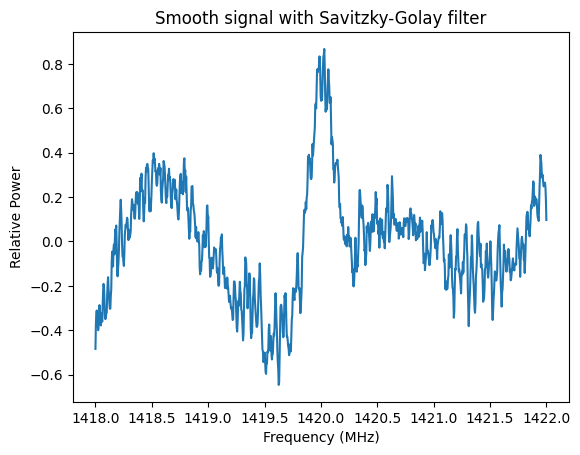

In [75]:
# Apply Savitzky-Golay filter to smooth the data
window_length = 11 # window_length: The length of the filter window (must be odd)
polyorder = 3  # polyorder: The order of the polynomial used to fit the samples

# Apply the Savitzky-Golay filter to the calibrated signal
smooth = savgol_filter(calibrated_signal, window_length=window_length, polyorder=polyorder)

# Plot the smoothed signal
plt.plot(freq_range, smooth)
plt.title("Smooth signal with Savitzky-Golay filter")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()


#3. Spectral Line Detection

Identifying the frequency where the spectral line peaks

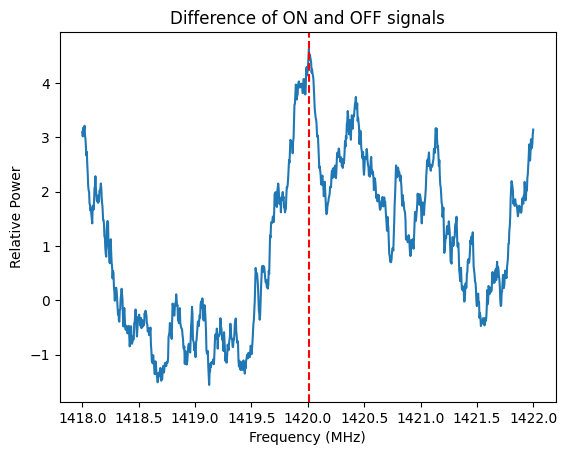

The frequency at which the spectral line peaks is 1420.01001001001 Hz


In [ ]:
#We find the peak of the spectral line by subtracting the OFF signal from the ON signal and finding the max value of the difference
peak_index = np.argmax(signal_ON - signal_OFF)
peak_freq = freq_range[peak_index]

#We plot the difference of the signals, along with a vertical line showing where the peak is found
plt.plot(freq_range, signal_ON - signal_OFF)
plt.axvline(x=peak_freq, color='r', linestyle='--')
plt.title("Difference of ON and OFF signals")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

print("The frequency at which the spectral line peaks is", peak_freq, "Hz")

Calculating the SNR(db)

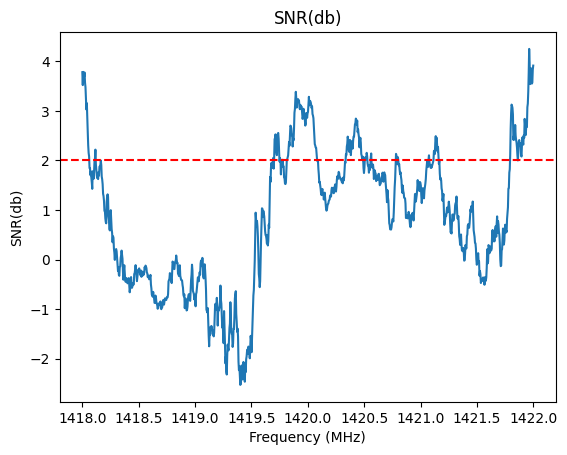

In [ ]:
#We calculate SNR by dividing the ON signal by the OFF signal and converting it to decibels
SNR = 10 * np.log10(signal_ON / signal_OFF)

#Plot the SNR(db) along with a horizontal line, showing where the SNR(db) is higher than 1
plt.plot(freq_range, SNR)
plt.axhline(y=2, color='r', linestyle='--')
plt.title("SNR(db)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("SNR(db)")
plt.show()

#4. Upsamping

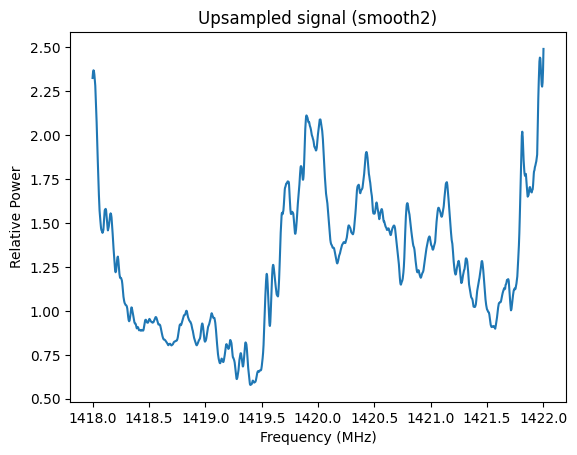

In [ ]:
#We upsample the smooth signal by using linear interpolation, doubling its sample size (from 1000 to 2000 samples)
smooth2 = np.interp(np.linspace(freq_range[0], freq_range[-1], 2000), freq_range, smooth)

#Plot the upsampled signal
plt.plot(np.linspace(freq_range[0], freq_range[-1], 2000), smooth2)
plt.title("Upsampled signal (smooth2)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

#5. Spectral Line Fitting

Fitting the smooth signal

<ipython-input-93-9c921af983e1>:7: RankWarning: Polyfit may be poorly conditioned
  poly_coefficients = np.polyfit(freq_range, smooth, degree)


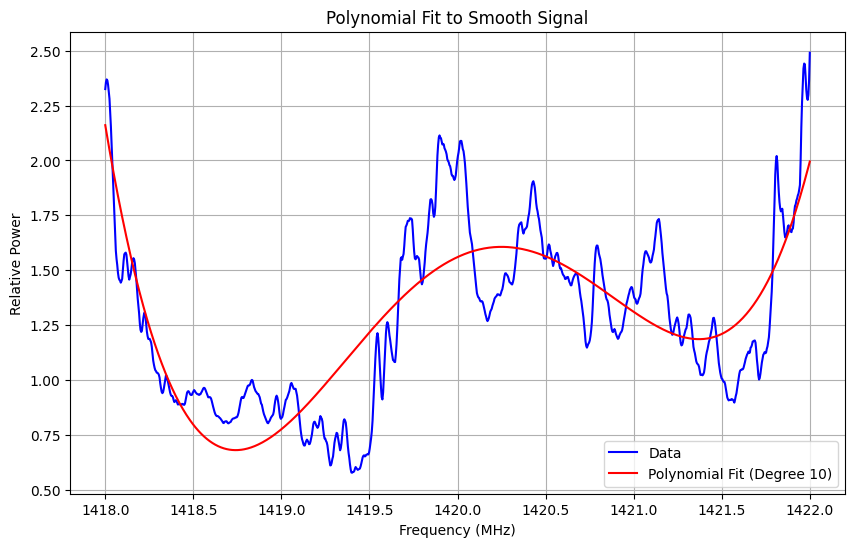

Polynomial coefficients (degree 10): [ 1.10264310e-21 -1.56606814e-18 -2.22357410e-15 -5.25805373e-13
  2.99019286e-09  6.36803606e-06  6.02800692e-03 -2.14297659e+00
 -1.82381256e+04 -2.58932272e+07  3.67769275e+10]


In [ ]:
degree = 10  # The degree of the polynomial

# Perform polynomial fitting using np.polyfit
poly_coefficients = np.polyfit(freq_range, smooth, degree)

# Generate the fitted polynomial values
fit = np.polyval(poly_coefficients, freq_range)

# Plot the original smooth signal and the fitted polynomial
plt.figure(figsize=(10, 6))
plt.plot(freq_range, smooth, label='Data', color='blue')
plt.plot(freq_range, fit, '-', label=f'Polynomial Fit (Degree {degree})', color='red')
plt.title('Polynomial Fit to Smooth Signal')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Power')
plt.legend()
plt.grid()
plt.show()

# Display the polynomial coefficients
print(f"Polynomial coefficients (degree {degree}): {poly_coefficients}")

Fitting the smooth2 signal

<ipython-input-94-0f83e41e61ff>:7: RankWarning: Polyfit may be poorly conditioned
  poly_coefficients2 = np.polyfit(freq_range2, smooth2, degree2)


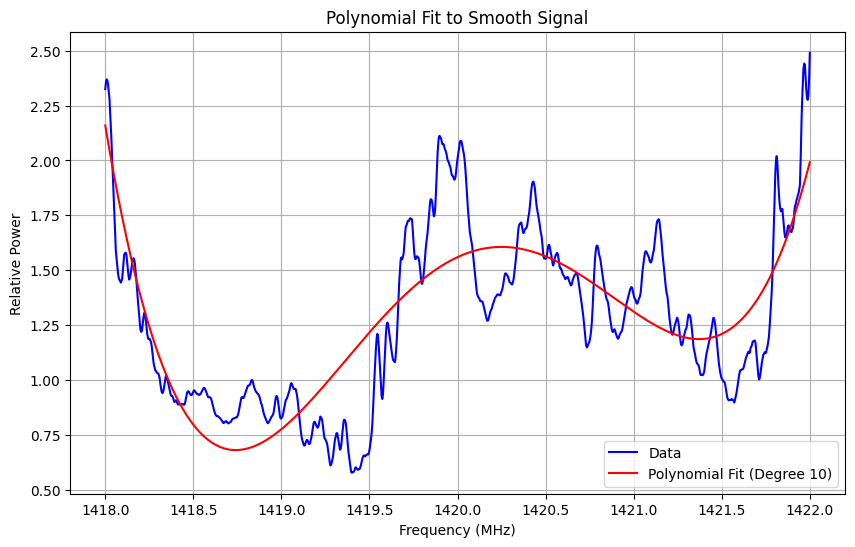

Polynomial coefficients (degree 10): [ 1.10264310e-21 -1.56606814e-18 -2.22357410e-15 -5.25805373e-13
  2.99019286e-09  6.36803606e-06  6.02800692e-03 -2.14297659e+00
 -1.82381256e+04 -2.58932272e+07  3.67769275e+10]


In [ ]:
degree2 = 10  # The degree of the polynomial

# Perform polynomial fitting using np.polyfit
poly_coefficients2 = np.polyfit(freq_range2, smooth2, degree2)

# Generate the fitted polynomial values
fit2 = np.polyval(poly_coefficients2, freq_range2)

# Plot the original smooth signal and the fitted polynomial
plt.figure(figsize=(10, 6))
plt.plot(freq_range2, smooth2, label='Data', color='blue')
plt.plot(freq_range2, fit2, '-', label=f'Polynomial Fit (Degree {degree})', color='red')
plt.title('Polynomial Fit to Smooth Signal')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Power')
plt.legend()
plt.grid()
plt.show()

# Display the polynomial coefficients
print(f"Polynomial coefficients (degree {degree}): {poly_coefficients}")

#6. Error estimation

We compare the "fit" and "spectral" signals

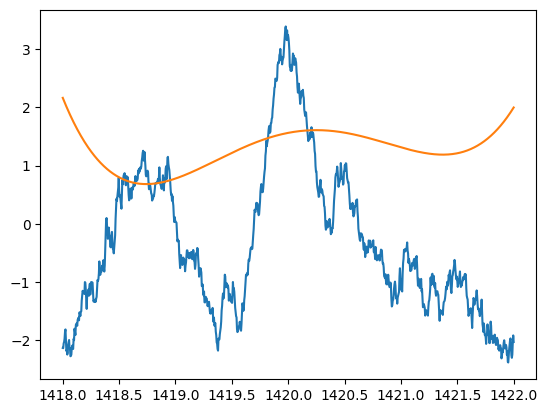

Standard Error of the Estimate: 0.23573133800417384
R-squared: 0.6566077882163974


In [ ]:
# We firsly plot the "fit" and "spectral" signals in the same graph
plt.plot(freq_range, spectral, label='smooth')
plt.plot(freq_range, fit, label='fit')
plt.show()

# Calculate residuals
residuals = smooth - fit

# Calculate standard error of the estimate
standard_error = np.sqrt(np.sum(residuals**2) / (len(smooth) - (degree + 1)))  # degree+1 because there are `degree+1` coefficients in polyfit

# We calculate the R-squared matric to evaluate how well our model explains the "smooth" curve's points
ss_res = np.sum(residuals**2)
ss_tot = np.sum((smooth - np.mean(smooth))**2)
r_squared = 1 - (ss_res / ss_tot)

# Display the error metrics
print(f"Standard Error of the Estimate: {standard_error}")
print(f"R-squared: {r_squared}")

We compare the "fit2" and "spectral2" signals

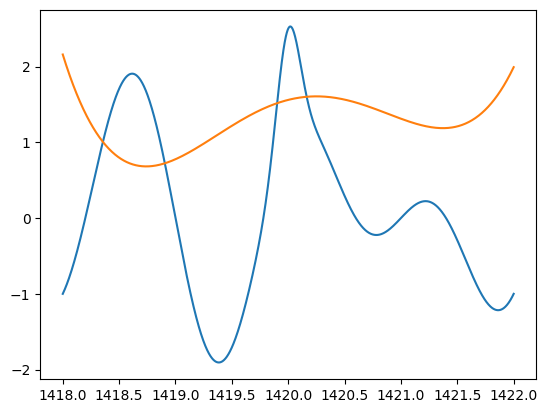

Standard Error of the Estimate: 0.2347753880990603
R-squared: 0.6560473027358358


In [ ]:
# We firsly plot the "fit2" and "spectral2" signals in the same graph
plt.plot(freq_range2, spectral2, label='smooth')
plt.plot(freq_range2, fit2, label='fit')
plt.show()

# Calculate residuals
residuals2 = smooth2 - fit2

# Calculate standard error of the estimate
standard_error2 = np.sqrt(np.sum(residuals2**2) / (len(smooth2) - (degree2 + 1)))  # degree+1 because there are `degree+1` coefficients in polyfit

# We calculate the R-squared matric to evaluate how well our model explains the "smooth" curve's points
ss_res2 = np.sum(residuals2**2)
ss_tot2 = np.sum((smooth2 - np.mean(smooth2))**2)
r_squared2 = 1 - (ss_res2 / ss_tot2)

# Display the error metrics
print(f"Standard Error of the Estimate: {standard_error2}")
print(f"R-squared: {r_squared2}")